In [17]:
import bars
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import random

In [18]:
import importlib
importlib.reload(bars)

[2025/03/17 16:12:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/vietz/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/vietz/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6

<module 'bars' from '/media/vietz/Data5/FPT/2025/SPRING/DPL302m/ASSIGNMENTS_AND_EXAMS/PROJECTS/ChartInsight/utils/bars.py'>

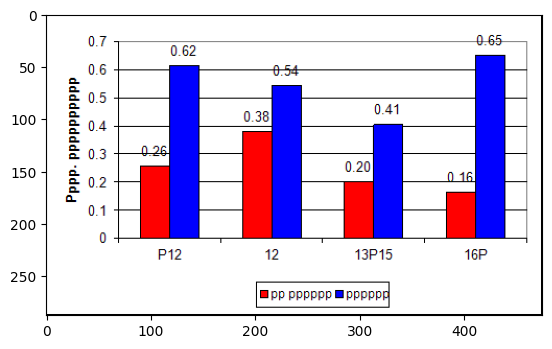

In [19]:
image_path = "./../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/8896506fff2fb5b692de7bc4c8e866ee_d3d3LnNzYy53aXNjLmVkdQkxNDQuOTIuMTkwLjQ3.xls-2-0.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

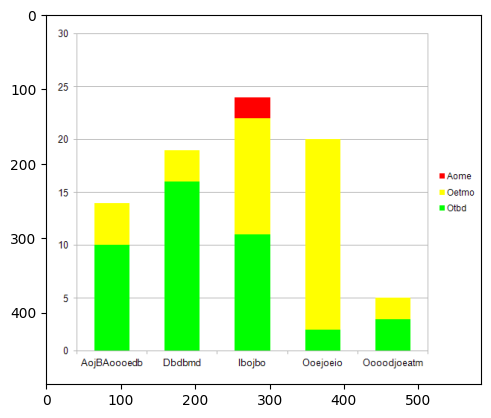

In [20]:
image_path = "./../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/8c992f9fee67dd6c66da0a30f477add4_b3BlbmFjY2Vzcy51b2MuZWR1CTIxMy43My40MC4yMTE=.xls-7-0.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [21]:
filtered = bars.detect_objects(bars.od_model, image, 4)
print(filtered)


0: 544x640 1 Legend, 1 PlotArea, 1 InnerPlotArea, 62.1ms
Speed: 1.5ms preprocess, 62.1ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)
[     11.278      14.361      512.66      477.77     0.97469           4]


In [22]:
plot_area = bars.get_plot_area(image_path)



image 1/1 /media/vietz/Data5/FPT/2025/SPRING/DPL302m/ASSIGNMENTS_AND_EXAMS/PROJECTS/ChartInsight/utils/../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/8c992f9fee67dd6c66da0a30f477add4_b3BlbmFjY2Vzcy51b2MuZWR1CTIxMy43My40MC4yMTE=.xls-7-0.png: 544x640 1 Legend, 1 PlotArea, 1 InnerPlotArea, 31.0ms
Speed: 1.7ms preprocess, 31.0ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)


In [23]:
bar_anns = bars.get_bar_anns(plot_area)
bar_anns


0: 608x640 11 Seriess, 42.3ms
Speed: 1.5ms preprocess, 42.3ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 640)


array([[     148.41,      210.79,      195.14,      437.73,     0.95375,           0],
       [     54.285,      295.67,      101.13,      437.92,     0.94721,           0],
       [     242.33,      281.49,      289.96,       437.9,     0.94615,           0],
       [     337.19,       153.9,      383.96,      409.01,     0.94107,           0],
       [     148.65,      168.64,      195.08,       210.7,     0.92959,           0],
       [     431.34,       395.4,      477.89,      437.68,     0.92835,           0],
       [      242.3,      125.25,      290.05,      281.77,      0.9269,           0],
       [     337.48,      409.49,      383.95,      437.62,     0.92548,           0],
       [      54.67,      239.89,      101.14,      295.48,     0.92493,           0],
       [     242.74,      98.157,      290.03,      125.39,     0.91311,           0],
       [     431.24,      366.66,      478.01,      395.37,     0.90794,           0]], dtype=float32)

In [24]:
ocr_results = bars.get_ocr_results(plot_area)
ocr_results

[2025/03/17 16:12:35] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.0835871696472168
[2025/03/17 16:12:35] ppocr DEBUG: cls num  : 12, elapsed : 0.016535282135009766
[2025/03/17 16:12:35] ppocr DEBUG: rec_res num  : 12, elapsed : 0.30476832389831543


[[[[[3.0, 5.0], [20.0, 5.0], [20.0, 19.0], [3.0, 19.0]],
   ('30', 0.9993171691894531)],
  [[[4.0, 78.0], [21.0, 78.0], [21.0, 91.0], [4.0, 91.0]],
   ('25', 0.999667763710022)],
  [[[3.0, 148.0], [21.0, 148.0], [21.0, 160.0], [3.0, 160.0]],
   ('20', 0.9985789060592651)],
  [[[5.0, 219.0], [21.0, 219.0], [21.0, 234.0], [5.0, 234.0]],
   ('15', 0.999807596206665)],
  [[[5.0, 289.0], [21.0, 289.0], [21.0, 303.0], [5.0, 303.0]],
   ('10', 0.9993672370910645)],
  [[[10.0, 361.0], [22.0, 361.0], [22.0, 375.0], [10.0, 375.0]],
   ('5', 0.999836802482605)],
  [[[35.0, 447.0], [119.0, 447.0], [119.0, 461.0], [35.0, 461.0]],
   ('AojBAoooedb', 0.9985814690589905)],
  [[[144.0, 446.0], [199.0, 446.0], [199.0, 461.0], [144.0, 461.0]],
   ('Dbdbmd', 0.9915657639503479)],
  [[[245.0, 447.0], [286.0, 447.0], [286.0, 462.0], [245.0, 462.0]],
   ('Ibojbo', 0.9703696370124817)],
  [[[333.0, 449.0], [387.0, 449.0], [387.0, 460.0], [333.0, 460.0]],
   ('Ooejoeio', 0.9633283615112305)],
  [[[413.0, 446.0

In [25]:
x_labels = bars.filter_x_labels(ocr_results, bar_anns=bar_anns)
y_labels = bars.filter_y_labels(ocr_results, bar_anns)

print(x_labels)
print(y_labels)

[{'text': 'AojBAoooedb', 'conf': 0.9985814690589905, 'x_mean': 77.0, 'y_mean': 454.0}, {'text': 'Dbdbmd', 'conf': 0.9915657639503479, 'x_mean': 171.5, 'y_mean': 453.5}, {'text': 'Ibojbo', 'conf': 0.9703696370124817, 'x_mean': 265.5, 'y_mean': 454.5}, {'text': 'Ooejoeio', 'conf': 0.9633283615112305, 'x_mean': 360.0, 'y_mean': 454.5}, {'text': 'Oooodjoeatm', 'conf': 0.9565330147743225, 'x_mean': 455.0, 'y_mean': 453.5}]
[{'text': '30', 'conf': 0.9993171691894531, 'x_mean': 11.5, 'y_mean': 12.0}, {'text': '25', 'conf': 0.999667763710022, 'x_mean': 12.5, 'y_mean': 84.5}, {'text': '20', 'conf': 0.9985789060592651, 'x_mean': 12.0, 'y_mean': 154.0}, {'text': '15', 'conf': 0.999807596206665, 'x_mean': 13.0, 'y_mean': 226.5}, {'text': '10', 'conf': 0.9993672370910645, 'x_mean': 13.0, 'y_mean': 296.0}, {'text': '5', 'conf': 0.999836802482605, 'x_mean': 16.0, 'y_mean': 368.0}]


In [26]:
bar_info = bars.get_bar_values(plot_area)
bar_info


0: 608x640 11 Seriess, 34.1ms
Speed: 1.8ms preprocess, 34.1ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 640)
[2025/03/17 16:12:35] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.04699230194091797
[2025/03/17 16:12:35] ppocr DEBUG: cls num  : 12, elapsed : 0.01515507698059082
[2025/03/17 16:12:36] ppocr DEBUG: rec_res num  : 12, elapsed : 0.29596805572509766


[{'bbox': [54.28483963012695,
   295.66802978515625,
   101.12593078613281,
   437.9195556640625],
  'label': 'AojBAoooedb',
  'value': 9.989573446552406,
  'color': '#7CFC00'},
 {'bbox': [54.66957092285156,
   239.88670349121094,
   101.14244842529297,
   295.47564697265625],
  'label': 'AojBAoooedb',
  'value': 3.903717941112733,
  'color': '#7CFC00'},
 {'bbox': [148.40695190429688,
   210.78775024414062,
   195.13743591308594,
   437.7313537597656],
  'label': 'Dbdbmd',
  'value': 15.937050808681532,
  'color': '#00FF00'},
 {'bbox': [148.6513671875,
   168.6428680419922,
   195.07676696777344,
   210.70208740234375],
  'label': 'Dbdbmd',
  'value': 2.953596865193228,
  'color': '#00FF00'},
 {'bbox': [242.3323211669922,
   281.4850769042969,
   289.9571838378906,
   437.9041442871094],
  'label': 'Ibojbo',
  'value': 10.984485069017733,
  'color': '#7CFC00'},
 {'bbox': [242.2973175048828,
   125.25047302246094,
   290.047607421875,
   281.77496337890625],
  'label': 'Ibojbo',
  'valu

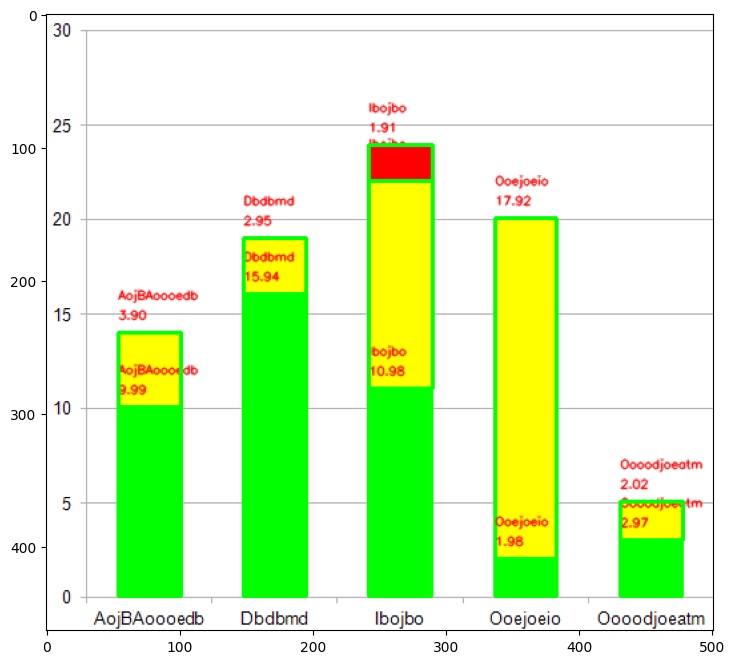

In [27]:
# plot the bars 
plot_area_copy = plot_area.copy()

for bar in bar_info:
    x1, y1, x2, y2 = map(int, bar['bbox'])

    cv2.rectangle(plot_area_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    text_x = x1
    text_y = y1 - 10 

    cv2.putText(plot_area_copy, bar['label'], (text_x, text_y - 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

    value_text = f"{bar['value']:.2f}"
    cv2.putText(plot_area_copy, value_text, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

plt.figure(figsize=(10, 8))
plt.imshow(plot_area_copy)
plt.show()

In [28]:
def plot_bar_ocr(image_path, numbers=20):
    # Lấy danh sách tất cả các ảnh trong thư mục
    image_files = glob.glob(os.path.join(image_path, "*.png"))  # Thay đổi định dạng nếu cần (*.jpg, *.jpeg, *.bmp,...)
    
    # Kiểm tra nếu số lượng ảnh trong thư mục ít hơn số ảnh yêu cầu
    if len(image_files) < numbers:
        print(f"Chỉ có {len(image_files)} ảnh trong thư mục, hiển thị tất cả.")
        selected_files = image_files
    else:
        selected_files = random.sample(image_files, numbers)  # Lấy ngẫu nhiên 'numbers' ảnh
    
    for img_file in selected_files:
        plot_area = cv2.imread(img_file)
        plot_area = cv2.cvtColor(plot_area, cv2.COLOR_BGR2RGB)

        # Lấy thông tin từ biểu đồ
        bar_info = bars.get_bar_values(plot_area)

        # Vẽ bounding box lên ảnh
        plot_area_copy = plot_area.copy()
        for bar in bar_info:
            x1, y1, x2, y2 = map(int, bar['bbox'])
            cv2.rectangle(plot_area_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            text_x, text_y = x1, y1 - 10
            cv2.putText(plot_area_copy, bar['label'], (text_x, text_y - 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

            value_text = f"{bar['value']:.2f}"
            cv2.putText(plot_area_copy, value_text, (text_x, text_y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1, cv2.LINE_AA)

        # Hiển thị ảnh
        plt.figure(figsize=(10, 8))
        plt.imshow(plot_area_copy)
        plt.title(f"Processed: {os.path.basename(img_file)}")
        plt.axis("off")
        plt.show()

In [29]:
image_path = './../assets/dataset/reduced_data/bardata(1031)/bar/images/test2019/'


0: 192x640 39 Seriess, 66.7ms
Speed: 1.1ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 640)
[2025/03/17 16:12:36] ppocr DEBUG: dt_boxes num : 86, elapsed : 0.11490774154663086
[2025/03/17 16:12:36] ppocr DEBUG: cls num  : 86, elapsed : 0.0986332893371582
[2025/03/17 16:12:39] ppocr DEBUG: rec_res num  : 86, elapsed : 2.624363660812378


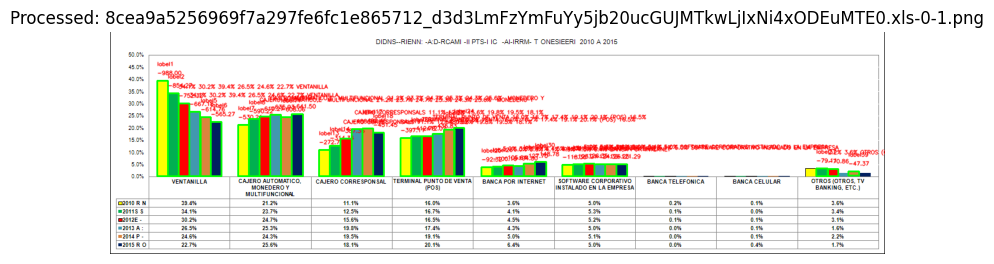


0: 384x640 31 Seriess, 41.3ms
Speed: 1.3ms preprocess, 41.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 16:12:39] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.12554693222045898
[2025/03/17 16:12:39] ppocr DEBUG: cls num  : 19, elapsed : 0.030144691467285156
[2025/03/17 16:12:40] ppocr DEBUG: rec_res num  : 19, elapsed : 0.528059720993042


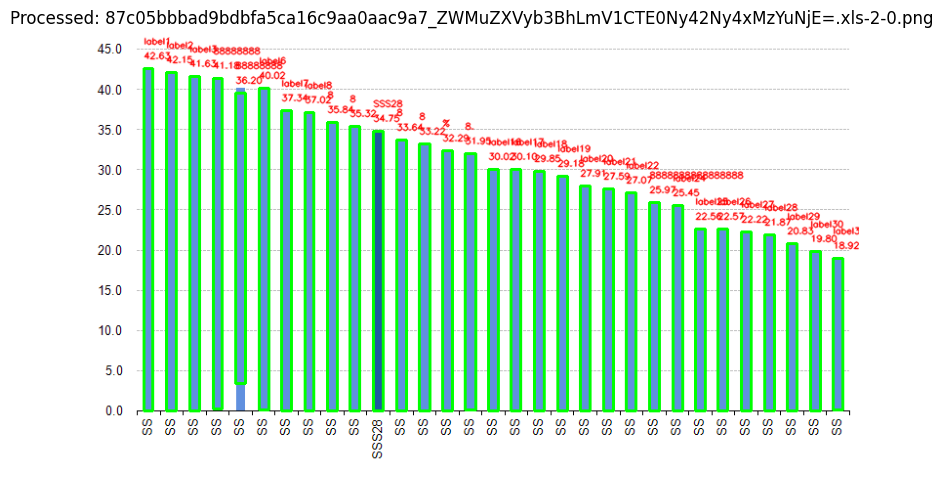


0: 384x640 69 Seriess, 22.4ms
Speed: 1.2ms preprocess, 22.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 16:12:40] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.1845703125
[2025/03/17 16:12:40] ppocr DEBUG: cls num  : 28, elapsed : 0.040212154388427734
[2025/03/17 16:12:41] ppocr DEBUG: rec_res num  : 28, elapsed : 1.2209789752960205


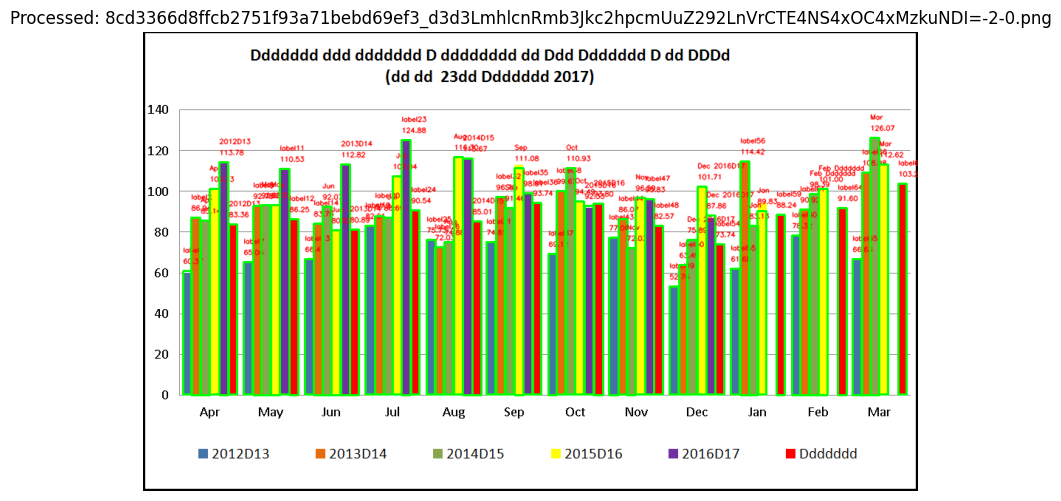


0: 416x640 3 Seriess, 41.5ms
Speed: 1.2ms preprocess, 41.5ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 16:12:41] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.05733919143676758
[2025/03/17 16:12:41] ppocr DEBUG: cls num  : 11, elapsed : 0.02166604995727539
[2025/03/17 16:12:42] ppocr DEBUG: rec_res num  : 11, elapsed : 0.5323846340179443


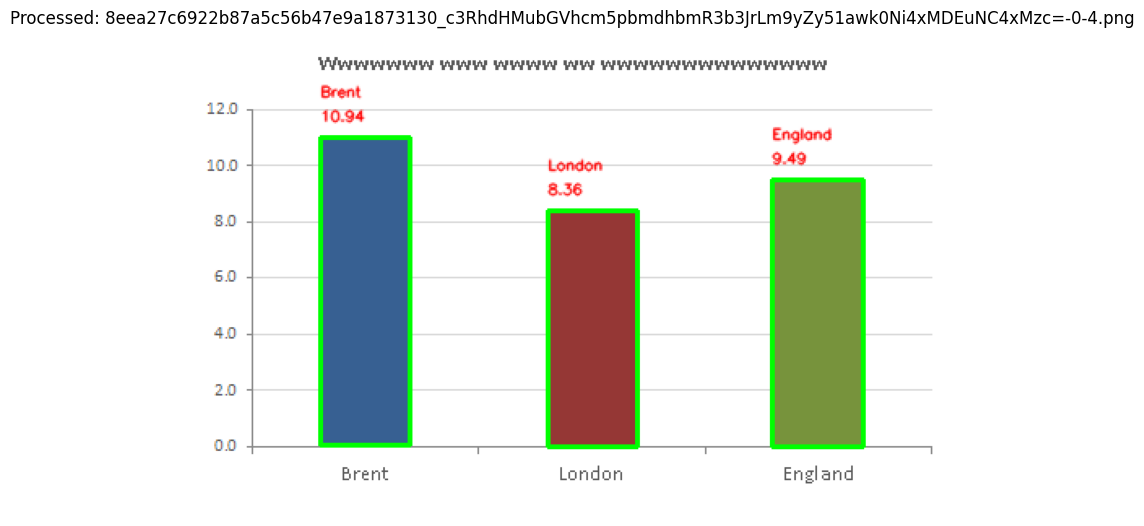


0: 384x640 25 Seriess, 23.0ms
Speed: 1.3ms preprocess, 23.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 16:12:42] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.0911855697631836
[2025/03/17 16:12:42] ppocr DEBUG: cls num  : 13, elapsed : 0.016454696655273438
[2025/03/17 16:12:43] ppocr DEBUG: rec_res num  : 13, elapsed : 0.33263683319091797


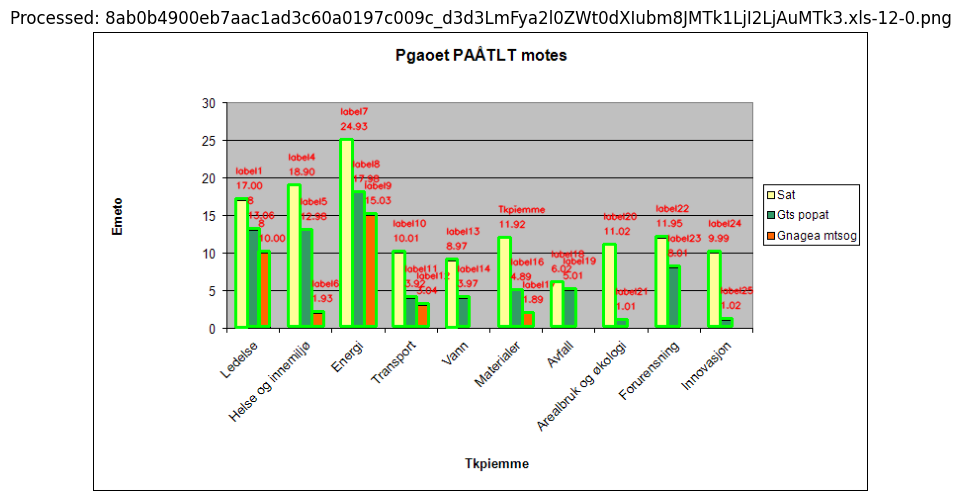


0: 480x640 8 Seriess, 43.3ms
Speed: 1.6ms preprocess, 43.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 16:12:43] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.0802457332611084
[2025/03/17 16:12:43] ppocr DEBUG: cls num  : 10, elapsed : 0.013593673706054688
[2025/03/17 16:12:43] ppocr DEBUG: rec_res num  : 10, elapsed : 0.23360943794250488


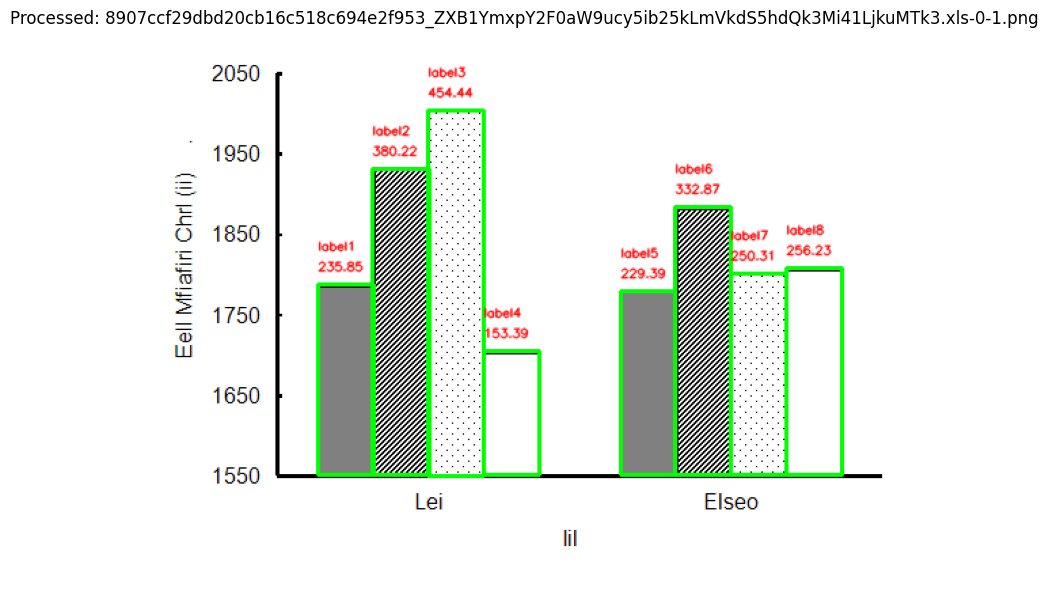


0: 480x640 56 Seriess, 27.7ms
Speed: 1.6ms preprocess, 27.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
[2025/03/17 16:12:43] ppocr DEBUG: dt_boxes num : 39, elapsed : 0.22861862182617188
[2025/03/17 16:12:43] ppocr DEBUG: cls num  : 39, elapsed : 0.047943830490112305
[2025/03/17 16:12:44] ppocr DEBUG: rec_res num  : 39, elapsed : 0.8159384727478027
[DEBUG] Not enough Y-axis labels to calculate values!


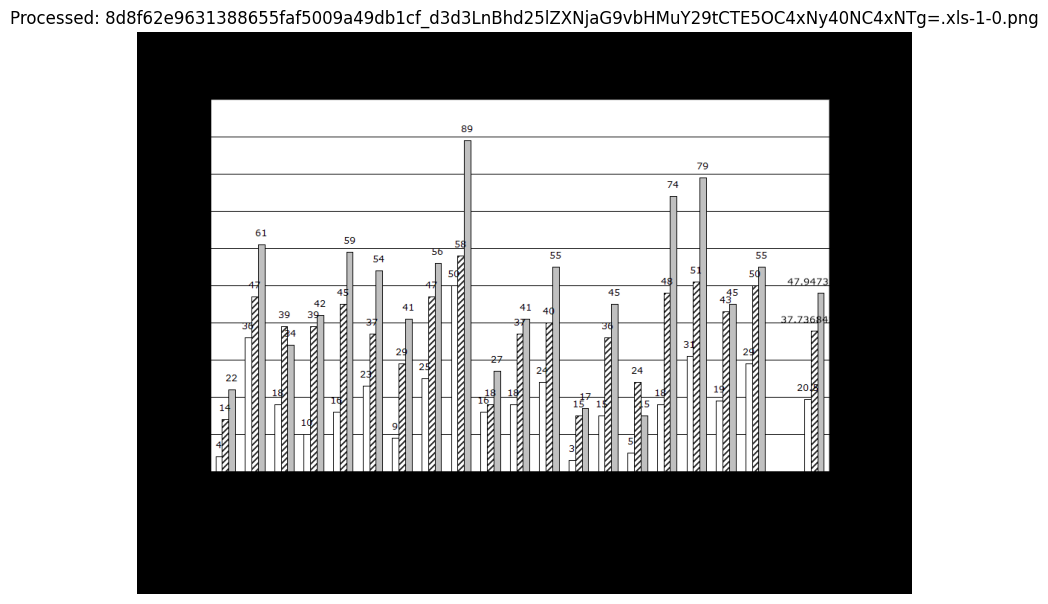


0: 320x640 18 Seriess, 21.6ms
Speed: 1.1ms preprocess, 21.6ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)
[2025/03/17 16:12:44] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.05893301963806152
[2025/03/17 16:12:44] ppocr DEBUG: cls num  : 6, elapsed : 0.006589174270629883
[2025/03/17 16:12:45] ppocr DEBUG: rec_res num  : 6, elapsed : 0.18017196655273438


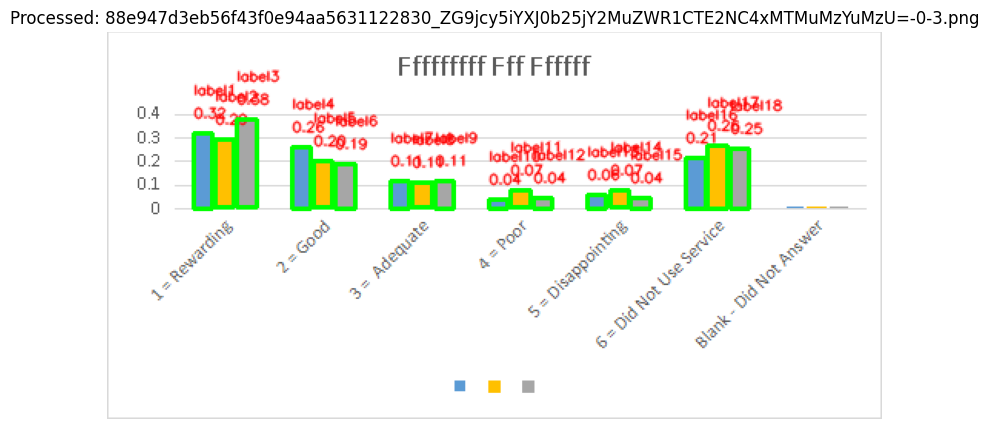


0: 288x640 39 Seriess, 46.0ms
Speed: 0.9ms preprocess, 46.0ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/17 16:12:45] ppocr DEBUG: dt_boxes num : 27, elapsed : 0.11909079551696777
[2025/03/17 16:12:45] ppocr DEBUG: cls num  : 27, elapsed : 0.032351016998291016
[2025/03/17 16:12:46] ppocr DEBUG: rec_res num  : 27, elapsed : 0.6417043209075928


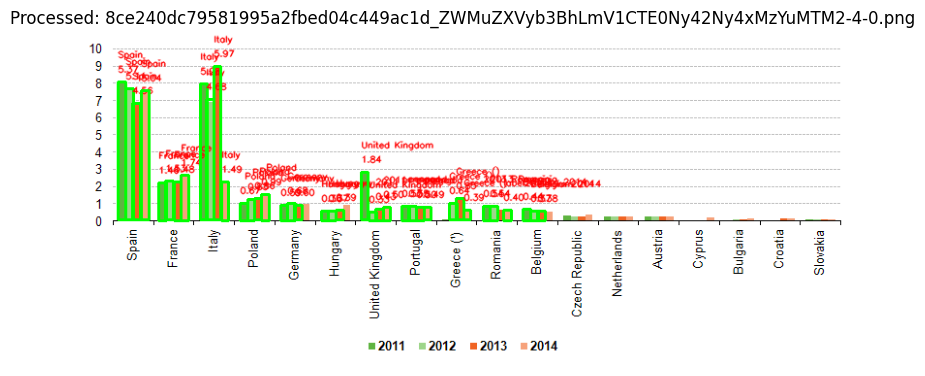


0: 384x640 24 Seriess, 22.9ms
Speed: 1.3ms preprocess, 22.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 16:12:46] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.06490349769592285
[2025/03/17 16:12:46] ppocr DEBUG: cls num  : 12, elapsed : 0.012270450592041016
[2025/03/17 16:12:46] ppocr DEBUG: rec_res num  : 12, elapsed : 0.2548820972442627


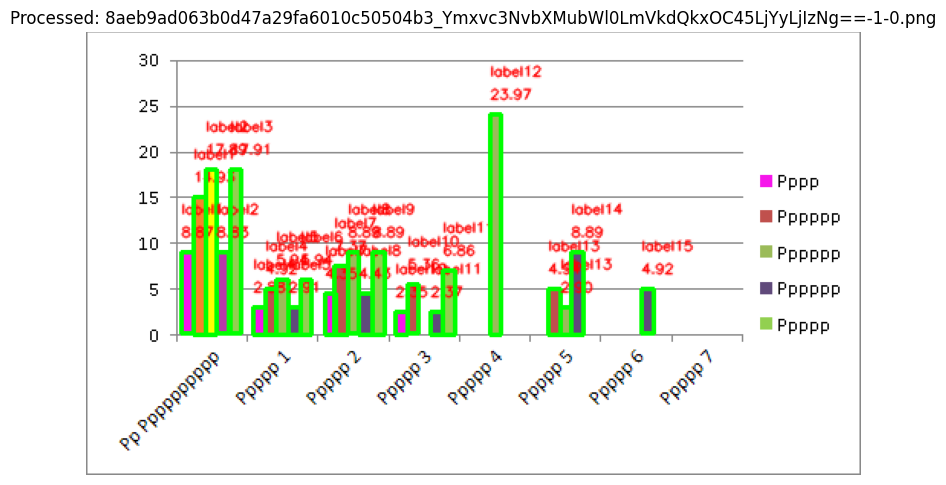


0: 416x640 4 Seriess, 26.1ms
Speed: 1.3ms preprocess, 26.1ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 16:12:46] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.14561223983764648
[2025/03/17 16:12:46] ppocr DEBUG: cls num  : 6, elapsed : 0.00661778450012207
[2025/03/17 16:12:47] ppocr DEBUG: rec_res num  : 6, elapsed : 0.2504746913909912
[DEBUG] Not enough Y-axis labels to calculate values!


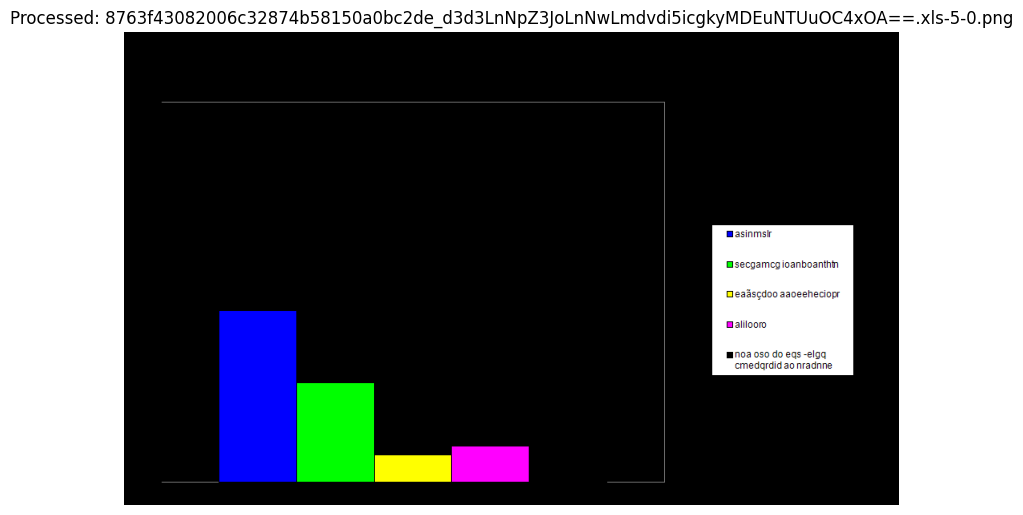


0: 416x640 4 Seriess, 25.6ms
Speed: 1.5ms preprocess, 25.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[2025/03/17 16:12:47] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.059175968170166016
[2025/03/17 16:12:47] ppocr DEBUG: cls num  : 25, elapsed : 0.03365516662597656
[2025/03/17 16:12:47] ppocr DEBUG: rec_res num  : 25, elapsed : 0.5590858459472656


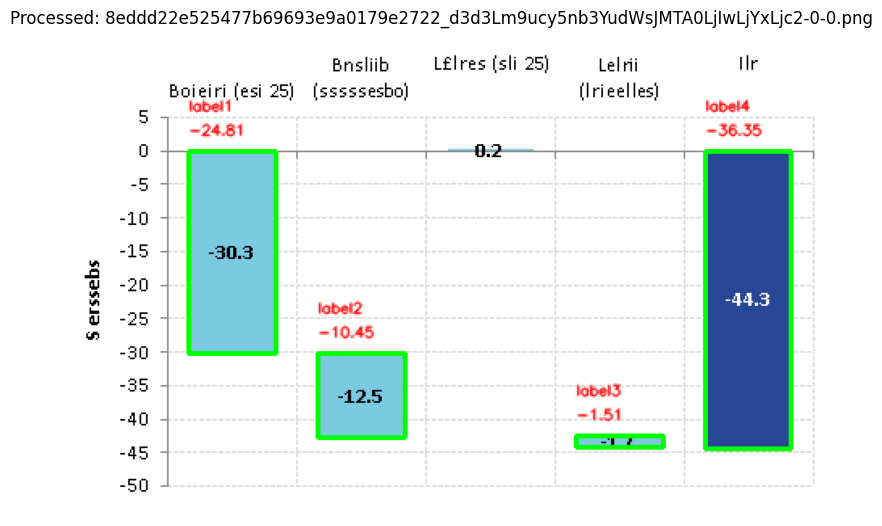


0: 384x640 59 Seriess, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
[2025/03/17 16:12:47] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.09844779968261719
[2025/03/17 16:12:48] ppocr DEBUG: cls num  : 28, elapsed : 0.040030717849731445
[2025/03/17 16:12:48] ppocr DEBUG: rec_res num  : 28, elapsed : 0.6791226863861084


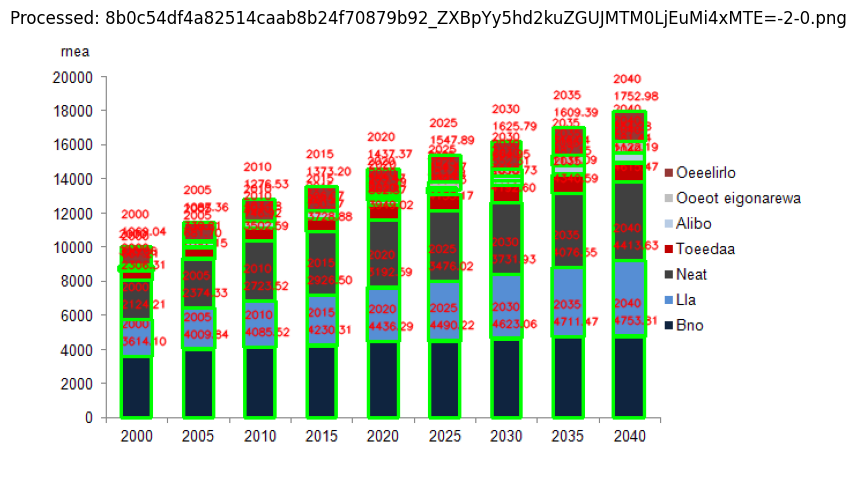


0: 288x640 37 Seriess, 19.2ms
Speed: 1.7ms preprocess, 19.2ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/17 16:12:48] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.1354045867919922
[2025/03/17 16:12:48] ppocr DEBUG: cls num  : 31, elapsed : 0.03529024124145508
[2025/03/17 16:12:49] ppocr DEBUG: rec_res num  : 31, elapsed : 0.7221429347991943


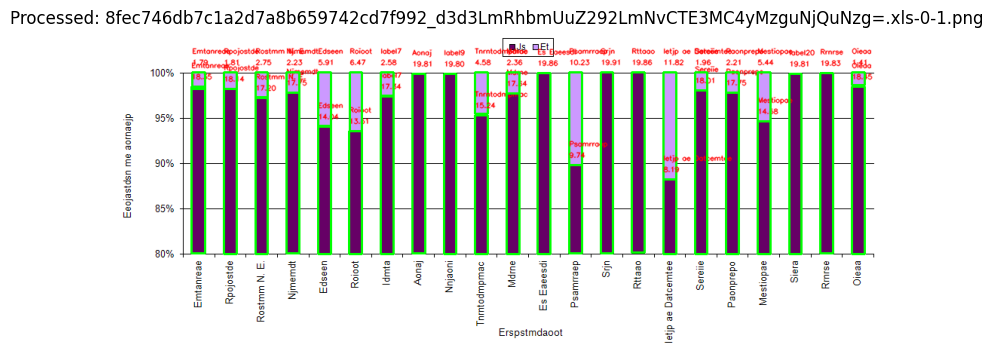


0: 352x640 15 Seriess, 22.5ms
Speed: 1.2ms preprocess, 22.5ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)
[2025/03/17 16:12:49] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.08116388320922852
[2025/03/17 16:12:49] ppocr DEBUG: cls num  : 23, elapsed : 0.036319732666015625
[2025/03/17 16:12:50] ppocr DEBUG: rec_res num  : 23, elapsed : 0.5354149341583252


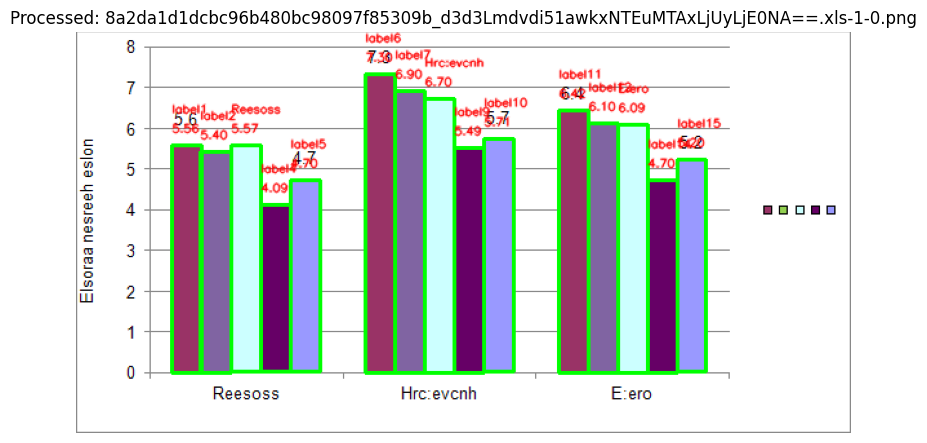


0: 288x640 38 Seriess, 19.3ms
Speed: 1.3ms preprocess, 19.3ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)
[2025/03/17 16:12:50] ppocr DEBUG: dt_boxes num : 16, elapsed : 0.05414772033691406
[2025/03/17 16:12:50] ppocr DEBUG: cls num  : 16, elapsed : 0.023612022399902344
[2025/03/17 16:12:51] ppocr DEBUG: rec_res num  : 16, elapsed : 0.41367387771606445


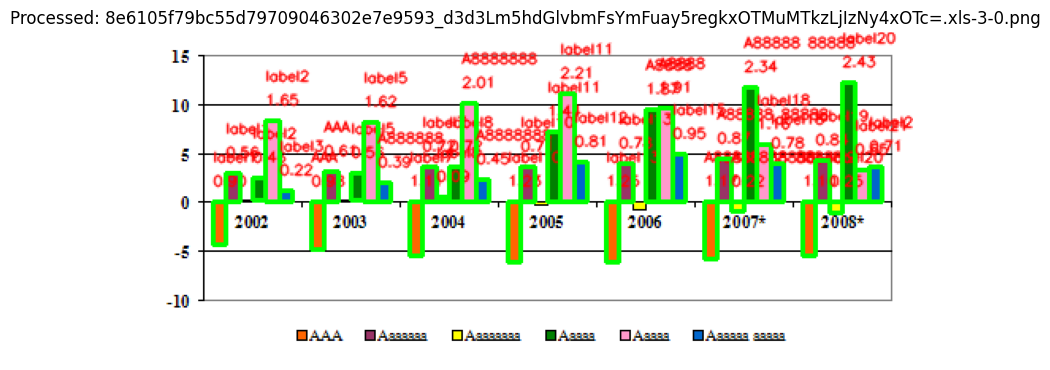


0: 256x640 18 Seriess, 41.4ms
Speed: 0.8ms preprocess, 41.4ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)
[2025/03/17 16:12:51] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.058759212493896484
[2025/03/17 16:12:51] ppocr DEBUG: cls num  : 17, elapsed : 0.02152705192565918
[2025/03/17 16:12:51] ppocr DEBUG: rec_res num  : 17, elapsed : 0.5085451602935791


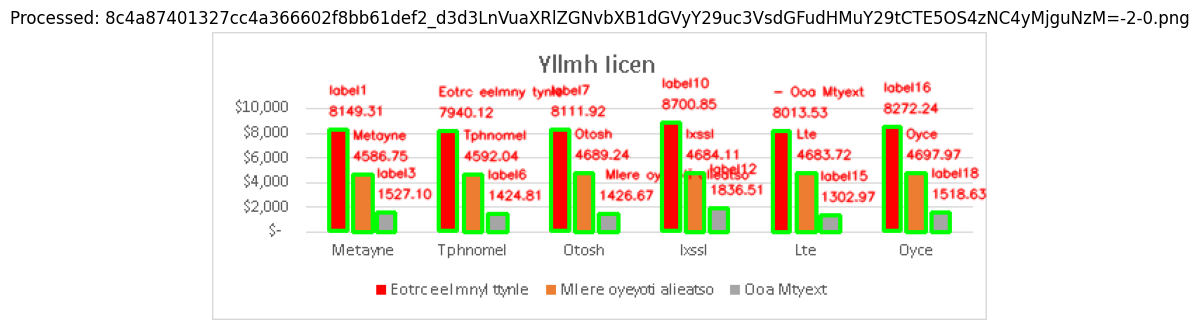


0: 512x640 5 Seriess, 65.1ms
Speed: 2.3ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)
[2025/03/17 16:12:52] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.05759239196777344
[2025/03/17 16:12:52] ppocr DEBUG: cls num  : 17, elapsed : 0.019449472427368164
[2025/03/17 16:12:52] ppocr DEBUG: rec_res num  : 17, elapsed : 0.3459014892578125


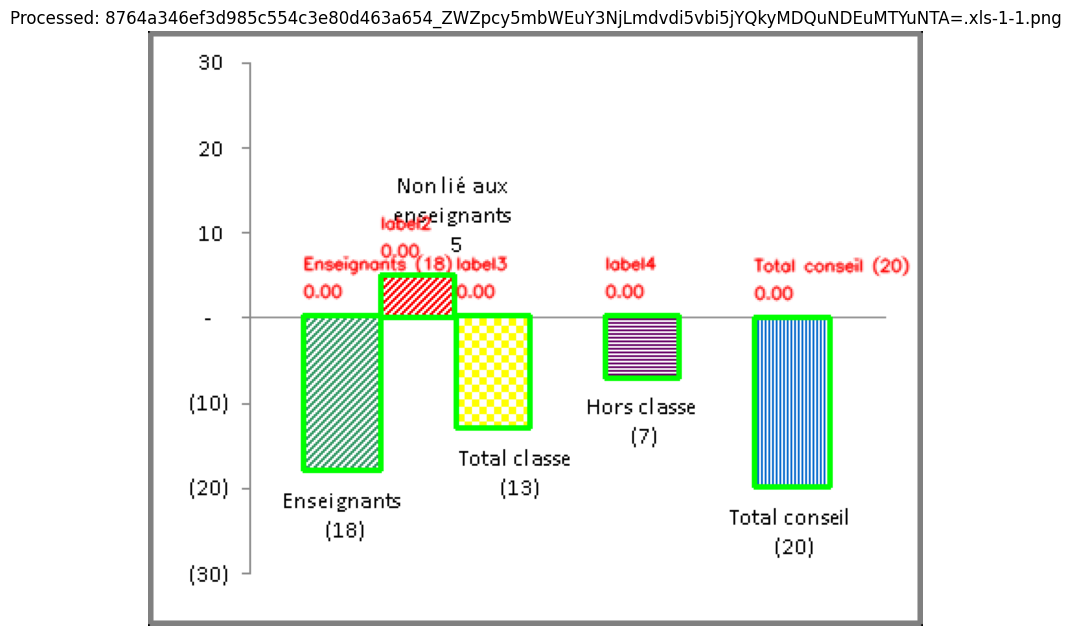


0: 224x640 43 Seriess, 42.0ms
Speed: 0.9ms preprocess, 42.0ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)
[2025/03/17 16:12:52] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.10363006591796875
[2025/03/17 16:12:52] ppocr DEBUG: cls num  : 10, elapsed : 0.01371908187866211
[2025/03/17 16:12:53] ppocr DEBUG: rec_res num  : 10, elapsed : 0.6954193115234375


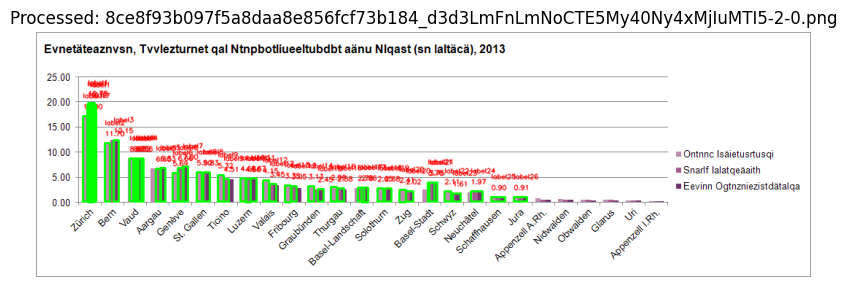


0: 576x640 36 Seriess, 41.6ms
Speed: 1.8ms preprocess, 41.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)
[2025/03/17 16:12:53] ppocr DEBUG: dt_boxes num : 40, elapsed : 0.15999460220336914
[2025/03/17 16:12:53] ppocr DEBUG: cls num  : 40, elapsed : 0.04228353500366211
[2025/03/17 16:12:54] ppocr DEBUG: rec_res num  : 40, elapsed : 1.303421974182129


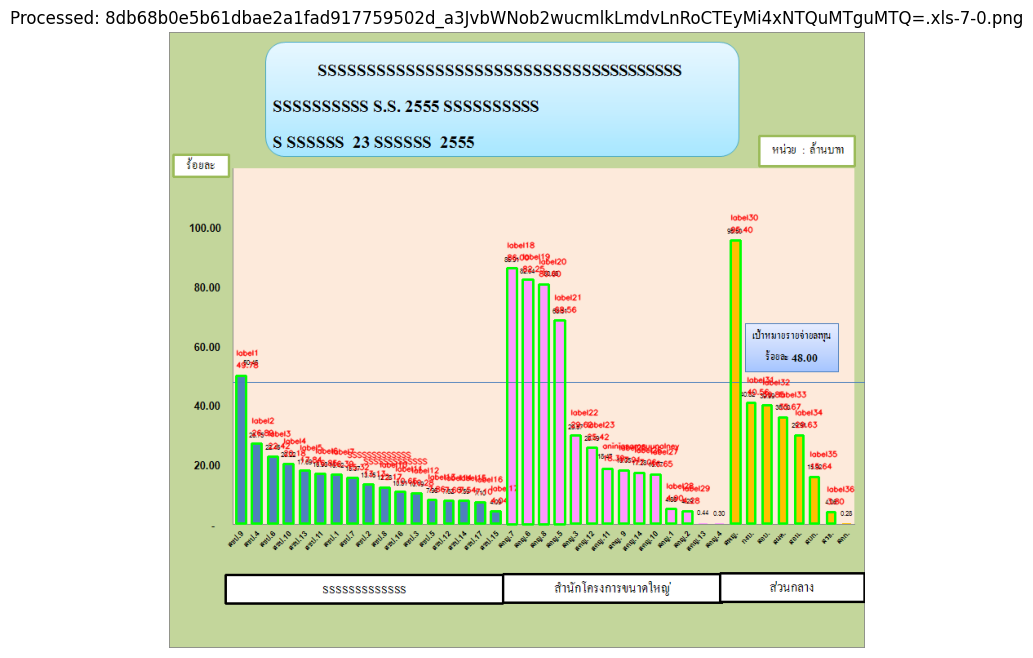

In [30]:
plot_bar_ocr(image_path)